## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  71.162505   747.304950  0.152262  6.711085  0.953599
1  91.213002  1579.741429  0.627548  4.520315  1.412850
2  63.328197  1721.108419  0.009281  8.385735  0.305936
3  35.122335   427.783882  0.846842  4.985129  1.460638
4   4.686104  1067.017732  0.297560  2.894200  1.373121


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0372113	total: 69.5ms	remaining: 1m 9s
1:	learn: 1.0284859	total: 70ms	remaining: 34.9s
2:	learn: 1.0174581	total: 70.5ms	remaining: 23.4s
3:	learn: 1.0076817	total: 70.9ms	remaining: 17.7s
4:	learn: 0.9983987	total: 71.5ms	remaining: 14.2s
5:	learn: 0.9883445	total: 71.9ms	remaining: 11.9s
6:	learn: 0.9773347	total: 72.4ms	remaining: 10.3s
7:	learn: 0.9675171	total: 72.8ms	remaining: 9.03s
8:	learn: 0.9584988	total: 73.3ms	remaining: 8.07s
9:	learn: 0.9485439	total: 73.8ms	remaining: 7.31s
10:	learn: 0.9404623	total: 74.2ms	remaining: 6.67s
11:	learn: 0.9308930	total: 74.7ms	remaining: 6.15s
12:	learn: 0.9228753	total: 75.1ms	remaining: 5.7s
13:	learn: 0.9133171	total: 75.6ms	remaining: 5.32s
14:	learn: 0.9041066	total: 76ms	remaining: 4.99s
15:	learn: 0.8961424	total: 76.5ms	remaining: 4.7s
16:	learn: 0.8865253	total: 77.8ms	remaining: 4.5s
17:	learn: 0.8777825	total: 78.2ms	remaining: 4.27s
18:	learn: 0.8710951	total: 78.6ms	remaining: 4.06s

89:	learn: 0.4689122	total: 108ms	remaining: 1.09s
90:	learn: 0.4650015	total: 109ms	remaining: 1.09s
91:	learn: 0.4612055	total: 109ms	remaining: 1.08s
92:	learn: 0.4574618	total: 110ms	remaining: 1.07s
93:	learn: 0.4546861	total: 110ms	remaining: 1.06s
94:	learn: 0.4513634	total: 111ms	remaining: 1.05s
95:	learn: 0.4481762	total: 111ms	remaining: 1.04s
96:	learn: 0.4450310	total: 111ms	remaining: 1.04s
97:	learn: 0.4419987	total: 112ms	remaining: 1.03s
98:	learn: 0.4394617	total: 112ms	remaining: 1.02s
99:	learn: 0.4361504	total: 113ms	remaining: 1.01s
100:	learn: 0.4331394	total: 113ms	remaining: 1.01s
101:	learn: 0.4291156	total: 114ms	remaining: 999ms
102:	learn: 0.4258325	total: 114ms	remaining: 992ms
103:	learn: 0.4225940	total: 114ms	remaining: 985ms
104:	learn: 0.4192665	total: 115ms	remaining: 978ms
105:	learn: 0.4155595	total: 115ms	remaining: 972ms
106:	learn: 0.4121639	total: 116ms	remaining: 965ms
107:	learn: 0.4092777	total: 116ms	remaining: 959ms
108:	learn: 0.4056838	t

270:	learn: 0.1639467	total: 187ms	remaining: 503ms
271:	learn: 0.1632614	total: 187ms	remaining: 502ms
272:	learn: 0.1625115	total: 188ms	remaining: 500ms
273:	learn: 0.1617109	total: 188ms	remaining: 499ms
274:	learn: 0.1612233	total: 189ms	remaining: 498ms
275:	learn: 0.1606245	total: 189ms	remaining: 496ms
276:	learn: 0.1599997	total: 190ms	remaining: 495ms
277:	learn: 0.1594656	total: 190ms	remaining: 494ms
278:	learn: 0.1584722	total: 191ms	remaining: 493ms
279:	learn: 0.1576969	total: 191ms	remaining: 491ms
280:	learn: 0.1571354	total: 191ms	remaining: 490ms
281:	learn: 0.1564918	total: 192ms	remaining: 488ms
282:	learn: 0.1559274	total: 192ms	remaining: 487ms
283:	learn: 0.1552180	total: 193ms	remaining: 486ms
284:	learn: 0.1545455	total: 193ms	remaining: 484ms
285:	learn: 0.1537754	total: 194ms	remaining: 483ms
286:	learn: 0.1532115	total: 194ms	remaining: 482ms
287:	learn: 0.1523690	total: 195ms	remaining: 481ms
288:	learn: 0.1516722	total: 195ms	remaining: 480ms
289:	learn: 

503:	learn: 0.0704383	total: 290ms	remaining: 285ms
504:	learn: 0.0702975	total: 291ms	remaining: 285ms
505:	learn: 0.0700140	total: 291ms	remaining: 284ms
506:	learn: 0.0696867	total: 292ms	remaining: 284ms
507:	learn: 0.0693640	total: 292ms	remaining: 283ms
508:	learn: 0.0692414	total: 293ms	remaining: 282ms
509:	learn: 0.0689262	total: 293ms	remaining: 281ms
510:	learn: 0.0686151	total: 293ms	remaining: 281ms
511:	learn: 0.0684958	total: 294ms	remaining: 280ms
512:	learn: 0.0684185	total: 294ms	remaining: 279ms
513:	learn: 0.0681147	total: 294ms	remaining: 278ms
514:	learn: 0.0678149	total: 295ms	remaining: 278ms
515:	learn: 0.0676990	total: 295ms	remaining: 277ms
516:	learn: 0.0675628	total: 296ms	remaining: 276ms
517:	learn: 0.0674868	total: 296ms	remaining: 275ms
518:	learn: 0.0671774	total: 296ms	remaining: 275ms
519:	learn: 0.0670637	total: 297ms	remaining: 274ms
520:	learn: 0.0669321	total: 297ms	remaining: 273ms
521:	learn: 0.0666008	total: 298ms	remaining: 273ms
522:	learn: 

687:	learn: 0.0457073	total: 368ms	remaining: 167ms
688:	learn: 0.0455821	total: 369ms	remaining: 166ms
689:	learn: 0.0454904	total: 369ms	remaining: 166ms
690:	learn: 0.0453569	total: 369ms	remaining: 165ms
691:	learn: 0.0452415	total: 370ms	remaining: 165ms
692:	learn: 0.0451206	total: 370ms	remaining: 164ms
693:	learn: 0.0450034	total: 371ms	remaining: 163ms
694:	learn: 0.0448818	total: 371ms	remaining: 163ms
695:	learn: 0.0447684	total: 371ms	remaining: 162ms
696:	learn: 0.0446787	total: 372ms	remaining: 162ms
697:	learn: 0.0445654	total: 373ms	remaining: 161ms
698:	learn: 0.0444460	total: 373ms	remaining: 161ms
699:	learn: 0.0443346	total: 373ms	remaining: 160ms
700:	learn: 0.0442253	total: 374ms	remaining: 159ms
701:	learn: 0.0440637	total: 374ms	remaining: 159ms
702:	learn: 0.0438960	total: 375ms	remaining: 158ms
703:	learn: 0.0437662	total: 375ms	remaining: 158ms
704:	learn: 0.0436719	total: 375ms	remaining: 157ms
705:	learn: 0.0435793	total: 376ms	remaining: 157ms
706:	learn: 

931:	learn: 0.0264676	total: 471ms	remaining: 34.4ms
932:	learn: 0.0264040	total: 472ms	remaining: 33.9ms
933:	learn: 0.0263943	total: 472ms	remaining: 33.4ms
934:	learn: 0.0263180	total: 473ms	remaining: 32.9ms
935:	learn: 0.0262719	total: 473ms	remaining: 32.3ms
936:	learn: 0.0261541	total: 474ms	remaining: 31.9ms
937:	learn: 0.0261070	total: 474ms	remaining: 31.3ms
938:	learn: 0.0259910	total: 475ms	remaining: 30.8ms
939:	learn: 0.0259796	total: 475ms	remaining: 30.3ms
940:	learn: 0.0258885	total: 476ms	remaining: 29.8ms
941:	learn: 0.0258207	total: 476ms	remaining: 29.3ms
942:	learn: 0.0257075	total: 476ms	remaining: 28.8ms
943:	learn: 0.0256676	total: 477ms	remaining: 28.3ms
944:	learn: 0.0255903	total: 477ms	remaining: 27.8ms
945:	learn: 0.0255441	total: 478ms	remaining: 27.3ms
946:	learn: 0.0253999	total: 478ms	remaining: 26.8ms
947:	learn: 0.0253505	total: 479ms	remaining: 26.3ms
948:	learn: 0.0252743	total: 479ms	remaining: 25.8ms
949:	learn: 0.0252257	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

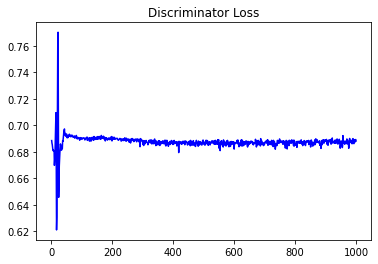

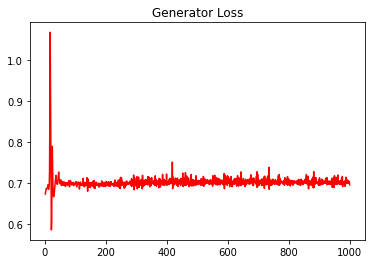

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19360476132019963


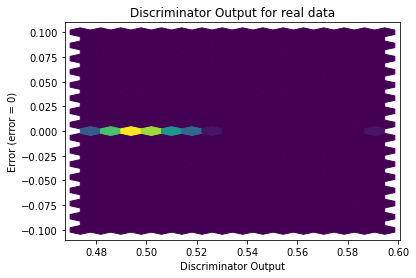

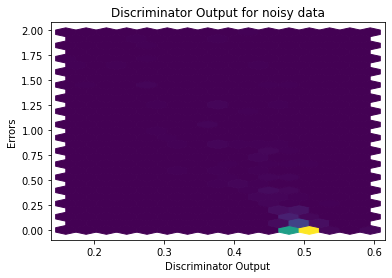

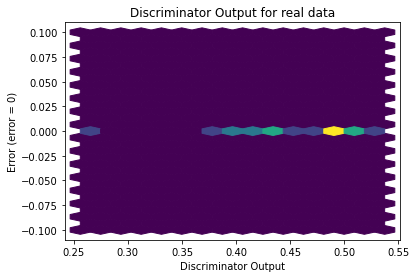

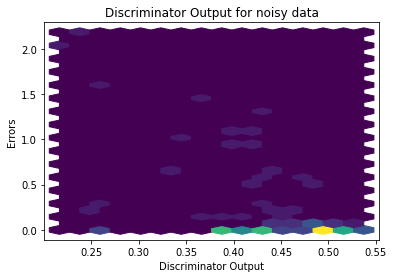

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


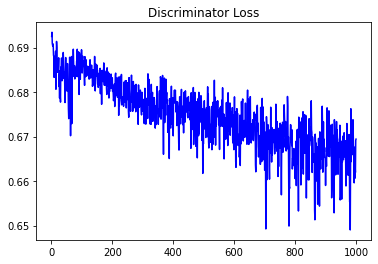

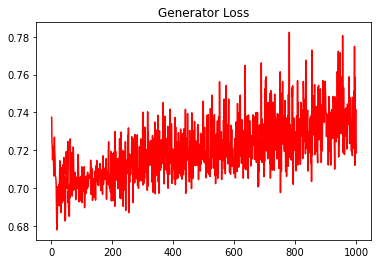

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11577113894232315


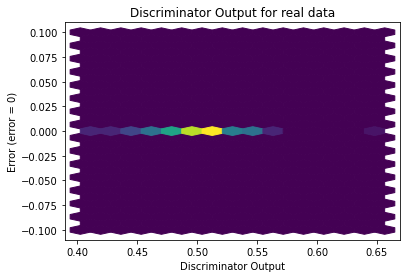

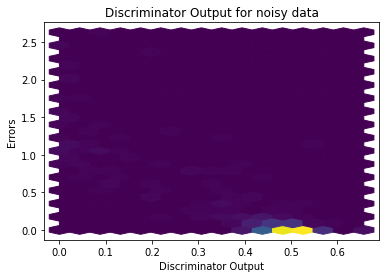

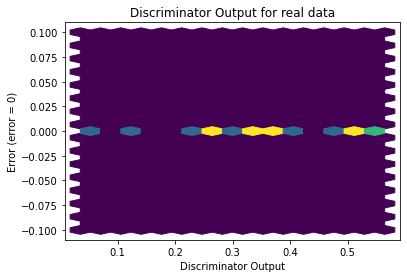

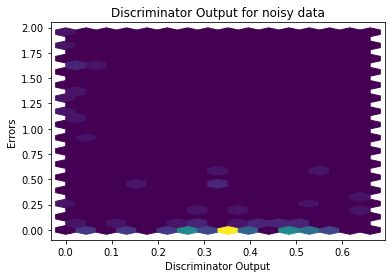

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2710]], requires_grad=True)
